## Imports

In [16]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [1]:
def solve_2d_diff_pure(u, nt, dt, dx, dy, nu):
    row, col = u.shape
    
    ###Assign initial conditions
    # set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    for n in range(nt): 
        for j in range(row):
            for i in range(2, col):
                u[j-1, i-1] = (u[j-1, i-1] + nu * dt / dx**2 * (u[j-1, i] - 2 * u[j-1, i-1] + u[j-1,i-2]) + 
                             nu * dt / dy**2 * (u[j, i-1] - 2 * u[j-1, i-1] + u[j-2,i-1]))
                                      
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
    
    #fill the update of u
        
    return 0

## Numba accelerator

In [4]:
@njit(fastmath=True)
def solve_2d_diff_numba(u, nt, dt, dx, dy, nu):
    row, col = u.shape
    
    ###Assign initial conditions
    # set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    
    
    #fill the update of u
    for n in range(nt): 
        for j in range(row):
            for i in range(2, col):
                u[j-1, i-1] = (u[j-1, i-1] + nu * dt / dx**2 * (u[j-1, i] - 2 * u[j-1, i-1] + u[j-1,i-2]) + 
                             nu * dt / dy**2 * (u[j, i-1] - 2 * u[j-1, i-1] + u[j-2,i-1]))
                                      
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
        
    return 0

## Pyccel accelerator

In [19]:
@types('float[:]', 'int', 'float', 'float','float', 'float')
def solve_2d_diff_pyccel(u, nt, dt, dx, dy, nu):
    row, col = u.shape
    
    ##Assign initial conditions
    #set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    
    
    #fill the update of u and v
    for n in range(nt): 
        for j in range(row):
            for i in range(2, col):
                u[j-1, i-1] = (u[j-1, i-1] + nu * dt / dx**2 * (u[j-1, i] - 2 * u[j-1, i-1] + u[j-1,i-2]) + 
                             nu * dt / dy**2 * (u[j, i-1] - 2 * u[j-1, i-1] + u[j-2,i-1]))
                                      
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
    return 0

## Inputs

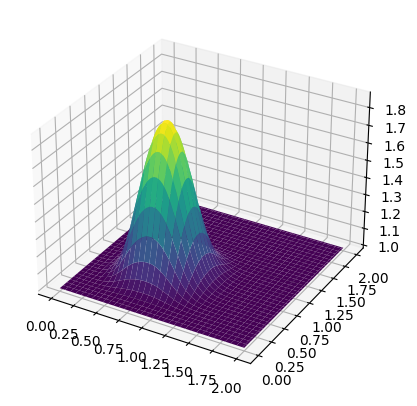

In [10]:
###variable declarations
nt = 51
nx = 101
ny = 101
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's

solve_2d_diff_pure(u, nt, dt, dx, dy, nu)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)

## Call Funtions

### Pure function

In [11]:
%timeit solve_2d_diff_pure(u, nt, dt, dx, dy, nu)

1.4 s ± 22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [12]:
%timeit solve_2d_diff_numba(u, nt, dt, dx, dy, nu)

3.02 ms ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [20]:
solve_2d_diff_f90 = epyccel(solve_2d_diff_pyccel)

IndexError: Rank mismatch.

In [17]:
%timeit solve_2d_diff_f90(u, nt, dt, dx, dy, nu)

NameError: name 'solve_2d_diff_f90' is not defined